In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

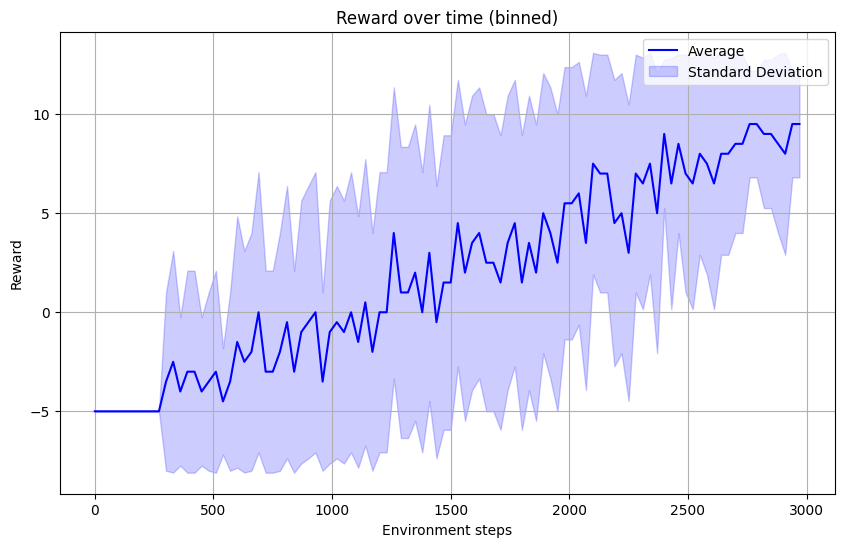

In [39]:
size = 3000
n_bins = 100

rewards = []

for i in range(10):
    rewards += list(np.random.choice([10, -5], size // 10, p=[i*0.1, 1 - i*0.1]))

rewards = np.array(rewards)

bin_size = size // n_bins
rewards_binned = rewards.reshape(-1, bin_size)

avgs = np.mean(rewards_binned, axis=1)
stdvs = np.std(rewards_binned, axis=1)

bins = np.arange(0, size, bin_size)

plt.figure(figsize=(10, 6))
plt.plot(bins, avgs, label='Average', color='blue')
plt.fill_between(bins, avgs - stdvs, avgs + stdvs, color='blue', alpha=0.2, label='Standard Deviation')

plt.xlabel('Environment steps')
plt.ylabel('Reward')
plt.title('Reward over time (binned)')
plt.legend()
plt.grid(True)
plt.show()

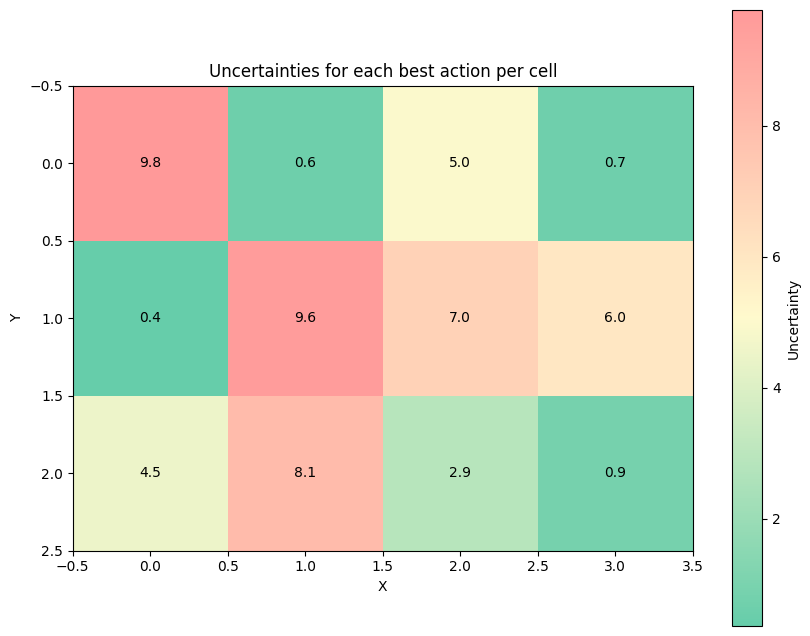

In [40]:
height = 3
width = 4

# Uncertainties is just a random value between 0 and 10 for now
uncertainties = np.random.uniform(0, 10, (height, width, 5))

best_actions = np.random.randint(0, 5, (height, width))

heatmap_values = np.zeros((height, width))
for x in range(width):
    for y in range(height):
        action = best_actions[y, x]
        heatmap_values[y, x] = uncertainties[y, x, action]


colours = [(0, "green"), (0.5, "yellow"), (1, "red")] # Normal red/yellow/green
colours = [(0, "#66cdaa"), (0.5, "#fffacd"), (1, "#ff9999")] # Lighter red/yellow/green
cmap = mcolors.LinearSegmentedColormap.from_list("stoplight", colours)

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_values, cmap=cmap, origin='upper', interpolation='nearest') # Red/yellow/green
# plt.imshow(heatmap_values, cmap='coolwarm', origin='upper', interpolation='nearest') # Hot/cold
plt.colorbar(label='Uncertainty')
plt.title('Uncertainties for each best action per cell')
plt.xlabel('X')
plt.ylabel('Y')

for x in range(width):
    for y in range(height):
        plt.text(x, y, f'{heatmap_values[y, x]:.1f}', ha='center', va='center', color='black')

plt.show()
